<a href="https://colab.research.google.com/github/KeisukeShimokawa/papers-challenge/blob/master/src/cv/ISDA/notebooks/Implisit_Semantic_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### environments

In [62]:
!pip list | grep torch

torch                         1.6.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.7.0+cu101    


## Setup

In [63]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.models import resnet34
from torchvision import datasets as dsets
from torchvision import transforms as T
from torchvision.utils import make_grid

In [73]:
num_classes = 10

cifar10 = dsets.CIFAR10(
    './dataset',
    train=True,
    download=True,
    transform=T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))
    ]))

train_loader = DataLoader(
    cifar10,
    batch_size=9,
    shuffle=True
)

images, labels = next(iter(train_loader))

Files already downloaded and verified


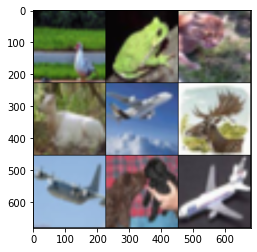

In [65]:
plt.imshow(make_grid(images, nrow=3, normalize=True).permute(1,2,0).numpy())

In [74]:
model = resnet34()
num_features = model.fc.in_features

feature_extractor = nn.Sequential(*list(model.children())[:-1])
fc = nn.Linear(num_features, num_classes)

## Implicit Semantic Data Augmentation

In [67]:
# step1: get features and predicted values and labels
features = feature_extractor(images)
print(features.size())

y = fc(features.view(-1, num_features))
print(y.size())

print(labels.size())

torch.Size([9, 512, 1, 1])
torch.Size([9, 10])
torch.Size([9])


In [75]:
# step2: prepare for statistical values
covariance = torch.zeros(num_classes, num_features, num_features)
average    = torch.zeros(num_classes, num_features)
amount     = torch.zeros(num_classes)

In [81]:
# step3: expand the features along the class dimension
N = features.size(0)
C = num_class
A = features.size(1)

NxCxFeatures = features.view(
    N, 1, A
).expand(
    N, C, A
)

print(NxCxFeatures.size())

labels_onehot = F.one_hot(labels, num_classes=num_classes)

print(labels.size())
print(labels_onehot.size())

NxCxA_onehot = labels_onehot.view(N, C, 1).expand(N, C, A)

print(NxCxA_onehot.size())

torch.Size([9, 10, 512])
torch.Size([9])
torch.Size([9, 10])
torch.Size([9, 10, 512])
